In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import folium
from geopy.geocoders import Nominatim

In [2]:
bridge_data = Path("Philly_bridge.csv")

In [3]:
bridge_df = pd.read_csv(bridge_data)
bridge_df

,Unnamed: 0,Bridge ID,PA,Philadelphia,Latitude,Longitude,Year Built,Owner,Maintenance,Bridge Condition,Bridge Improvement Cost,Roadway Improvement Cost,Total Improvement Cost,Year Reconstructed,Deck Width,Structure Length,SqFt,Repair Cost Est,Replacement Cost Est
0,72,73,1,101,32.317753,-86.298506,1920,4,City or Municipal Highway Agency,F,376.0,38.0,414.0,0.0,0.0,9.6,0.00,0.00,0.0000
1,655,656,1,101,32.377444,-86.323508,1935,4,City or Municipal Highway Agency,F,3238.0,324.0,3562.0,0.0,15.8,80.8,1276.64,400864.96,529141.7472
2,777,778,1,101,32.385767,-86.298511,1937,4,City or Municipal Highway Agency,F,1408.0,141.0,1549.0,0.0,12.6,40.5,510.30,160234.20,211509.1440
3,778,779,1,101,32.386708,-86.298456,1937,4,City or Municipal Highway Agency,F,416.0,42.0,458.0,0.0,12.7,8.2,104.14,32699.96,43163.9472
4,779,780,1,101,32.409953,-86.287686,1937,4,City or Municipal Highway Agency,F,2042.0,204.0,2246.0,0.0,13.4,57.3,767.82,241095.48,318246.0336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615299,615300,55,101,42.723533,-87.798839,1936,4,City or Municipal Highway Agency,F,0.0,0.0,0.0,0.0,17.1,49.7,849.87,266859.18,352254.1176
386,615300,615301,55,101,42.775436,-87.776017,1970,4,City or Municipal Highway Agency,G,0.0,0.0,0.0,0.0,12.8,7.6,97.28,30545.92,40320.6144
387,615302,615303,55,101,42.829033,-87.915131,1971,4,City or Municipal Highway Agency,F,0.0,0.0,0.0,0.0,0.0,8.2,0.00,0.00,0.0000
388,615306,615307,55,101,42.824433,-87.910328,1940,4,City or Municipal Highway Agency,P,87.0,8.0,131.0,0.0,6.8,6.9,46.92,14732.88,19447.4016


In [4]:
bridge_df.dtypes

Unnamed: 0                    int64
Bridge ID                     int64
PA                            int64
Philadelphia                  int64
Latitude                    float64
Longitude                   float64
Year Built                    int64
Owner                         int64
Maintenance                  object
Bridge Condition             object
Bridge Improvement Cost     float64
Roadway Improvement Cost    float64
Total Improvement Cost      float64
Year Reconstructed          float64
Deck Width                  float64
Structure Length            float64
SqFt                        float64
Repair Cost Est             float64
Replacement Cost Est        float64
dtype: object

In [5]:
total_repair_cost_est = bridge_df["Repair Cost Est"].sum()
total_replacement_cost_est = bridge_df["Replacement Cost Est"].sum()
difference = total_replacement_cost_est - total_repair_cost_est
def format_currency(amount):
    return '${:,.2f}'.format(amount)
total_repair_cost_est_formatted = format_currency(total_repair_cost_est)
total_replacement_cost_est_formatted = format_currency(total_replacement_cost_est)
difference_formatted = format_currency(difference)
print('Total Repair Cost Est:', total_repair_cost_est_formatted)
print('Total Replacement Cost Est:', total_replacement_cost_est_formatted)
print('Total Savings By Repairing Versus Replacing:', difference_formatted)

Total Repair Cost Est: $62,549,927.26
Total Replacement Cost Est: $82,565,903.98
Total Savings By Repairing Versus Replacing: $20,015,976.72


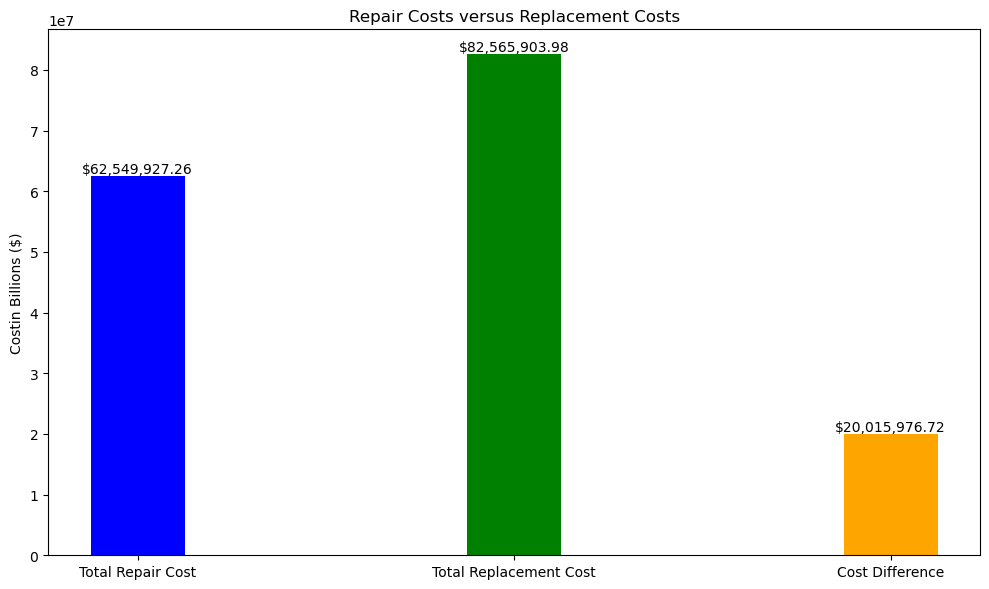

In [6]:
labels = ['Total Repair Cost', 'Total Replacement Cost', 'Cost Difference']
values = [total_repair_cost_est, total_replacement_cost_est, difference]

x_pos = np.arange(len(labels))

plt.figure(figsize=(10,6))
bars = plt.bar(labels, values, color=['blue', 'green', 'orange'], width=0.25)
plt.title('Repair Costs versus Replacement Costs')
plt.ylabel('Costin Billions ($)')
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), format_currency(value),
             ha='center', va='bottom', color='black', fontsize=10)
plt.xticks(x_pos, labels, rotation=0)
plt.tight_layout()
plt.show()

In [7]:
def format_currency(amount):
    return '${:,.2f}'.format(amount)
bridge_df['Repair Cost Est'] = bridge_df['Repair Cost Est'].apply(format_currency)
bridge_df['Replacement Cost Est'] = bridge_df['Replacement Cost Est'].apply(format_currency)
bridge_df

,Unnamed: 0,Bridge ID,PA,Philadelphia,Latitude,Longitude,Year Built,Owner,Maintenance,Bridge Condition,Bridge Improvement Cost,Roadway Improvement Cost,Total Improvement Cost,Year Reconstructed,Deck Width,Structure Length,SqFt,Repair Cost Est,Replacement Cost Est
0,72,73,1,101,32.317753,-86.298506,1920,4,City or Municipal Highway Agency,F,376.0,38.0,414.0,0.0,0.0,9.6,0.00,$0.00,$0.00
1,655,656,1,101,32.377444,-86.323508,1935,4,City or Municipal Highway Agency,F,3238.0,324.0,3562.0,0.0,15.8,80.8,1276.64,"$400,864.96","$529,141.75"
2,777,778,1,101,32.385767,-86.298511,1937,4,City or Municipal Highway Agency,F,1408.0,141.0,1549.0,0.0,12.6,40.5,510.30,"$160,234.20","$211,509.14"
3,778,779,1,101,32.386708,-86.298456,1937,4,City or Municipal Highway Agency,F,416.0,42.0,458.0,0.0,12.7,8.2,104.14,"$32,699.96","$43,163.95"
4,779,780,1,101,32.409953,-86.287686,1937,4,City or Municipal Highway Agency,F,2042.0,204.0,2246.0,0.0,13.4,57.3,767.82,"$241,095.48","$318,246.03"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615299,615300,55,101,42.723533,-87.798839,1936,4,City or Municipal Highway Agency,F,0.0,0.0,0.0,0.0,17.1,49.7,849.87,"$266,859.18","$352,254.12"
386,615300,615301,55,101,42.775436,-87.776017,1970,4,City or Municipal Highway Agency,G,0.0,0.0,0.0,0.0,12.8,7.6,97.28,"$30,545.92","$40,320.61"
387,615302,615303,55,101,42.829033,-87.915131,1971,4,City or Municipal Highway Agency,F,0.0,0.0,0.0,0.0,0.0,8.2,0.00,$0.00,$0.00
388,615306,615307,55,101,42.824433,-87.910328,1940,4,City or Municipal Highway Agency,P,87.0,8.0,131.0,0.0,6.8,6.9,46.92,"$14,732.88","$19,447.40"


In [8]:
geolocator = Nominatim(user_agent="bridge_address")

In [9]:
def reverse_geocode(row):
    location = geolocator.reverse((row["Latitude"], row['Longitude']), exactly_one=True)
    if location:
        return location.address
    else:
        return "N/A"
    
#Add in Address column with reverse geocode data
bridge_df["Address"] = bridge_df.apply(reverse_geocode, axis=1)

bridge_df

,Unnamed: 0,Bridge ID,PA,Philadelphia,Latitude,Longitude,Year Built,Owner,Maintenance,Bridge Condition,Bridge Improvement Cost,Roadway Improvement Cost,Total Improvement Cost,Year Reconstructed,Deck Width,Structure Length,SqFt,Repair Cost Est,Replacement Cost Est,Address
0,72,73,1,101,32.317753,-86.298506,1920,4,City or Municipal Highway Agency,F,376.0,38.0,414.0,0.0,0.0,9.6,0.00,$0.00,$0.00,"4400, Norman Bridge Road, Southmont, Montgomer..."
1,655,656,1,101,32.377444,-86.323508,1935,4,City or Municipal Highway Agency,F,3238.0,324.0,3562.0,0.0,15.8,80.8,1276.64,"$400,864.96","$529,141.75","Maxwell Boulevard, Montgomery, Montgomery Coun..."
2,777,778,1,101,32.385767,-86.298511,1937,4,City or Municipal Highway Agency,F,1408.0,141.0,1549.0,0.0,12.6,40.5,510.30,"$160,234.20","$211,509.14","North Ripley Street, Clisby Park, Montgomery, ..."
3,778,779,1,101,32.386708,-86.298456,1937,4,City or Municipal Highway Agency,F,416.0,42.0,458.0,0.0,12.7,8.2,104.14,"$32,699.96","$43,163.95","897, North Ripley Street, Clisby Park, Montgom..."
4,779,780,1,101,32.409953,-86.287686,1937,4,City or Municipal Highway Agency,F,2042.0,204.0,2246.0,0.0,13.4,57.3,767.82,"$241,095.48","$318,246.03","Lower Wetumpka Road, Garden Square, Montgomery..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615299,615300,55,101,42.723533,-87.798839,1936,4,City or Municipal Highway Agency,F,0.0,0.0,0.0,0.0,17.1,49.7,849.87,"$266,859.18","$352,254.12","200, North Memorial Drive, Racine, Racine Coun..."
386,615300,615301,55,101,42.775436,-87.776017,1970,4,City or Municipal Highway Agency,G,0.0,0.0,0.0,0.0,12.8,7.6,97.28,"$30,545.92","$40,320.61","Campus Court, Wind Meadows, Wind Point, Racine..."
387,615302,615303,55,101,42.829033,-87.915131,1971,4,City or Municipal Highway Agency,F,0.0,0.0,0.0,0.0,0.0,8.2,0.00,$0.00,$0.00,"11569, 7 Mile Road, Caledonia, Racine County, ..."
388,615306,615307,55,101,42.824433,-87.910328,1940,4,City or Municipal Highway Agency,P,87.0,8.0,131.0,0.0,6.8,6.9,46.92,"$14,732.88","$19,447.40","10401, Forest Hills Road, Caledonia, Racine Co..."


In [ ]:
good_bridges_df = bridge_df[bridge_df['Bridge Condition'] == 'G']
good_bridges_df
m = folium.Map([40.10345, -74.961092], zoom_start=11)



# Iterate over the "Good" bridges DataFrame and add markers to the map
for index, row in good_bridges_df.iterrows():
    folium.Marker(
    location=[row['Latitude'], row['Longitude']],
    popup=f"Bridge {row['Address']}", 
    icon=folium.Icon(color="green"),
    ).add_to(m)
m

# Show the map in a browser
#m.save("good_bridges_map.html")

In [10]:
fair_bridges_df = bridge_df[bridge_df['Bridge Condition'] == 'F']
fair_bridges_df
m = folium.Map([40.10345, -74.961092], zoom_start=11)



# Iterate over the "Good" bridges DataFrame and add markers to the map
for index, row in fair_bridges_df.iterrows():
    folium.Marker(
    location=[row['Latitude'], row['Longitude']],
    popup=f"Bridge {row['Address']}", 
    icon=folium.Icon(color="orange"),
    ).add_to(m)
m

# Show the map in a browser
#m.save("good_bridges_map.html")

In [11]:
poor_bridges_df = bridge_df[bridge_df['Bridge Condition'] == 'P']
poor_bridges_df
m = folium.Map([40.10345, -74.961092], zoom_start=11)



# Iterate over the "Good" bridges DataFrame and add markers to the map
for index, row in fair_bridges_df.iterrows():
    folium.Marker(
    location=[row['Latitude'], row['Longitude']],
    popup=f"Bridge {row['Address']}", 
    icon=folium.Icon(color="red"),
    ).add_to(m)
m

# Show the map in a browser
#m.save("good_bridges_map.html")